In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [3]:
Items = pd.read_csv('Items.csv')
customers = pd.read_csv('customers.csv')
order_item = pd.read_csv('order_item.csv')
orders = pd.read_csv('orders.csv')

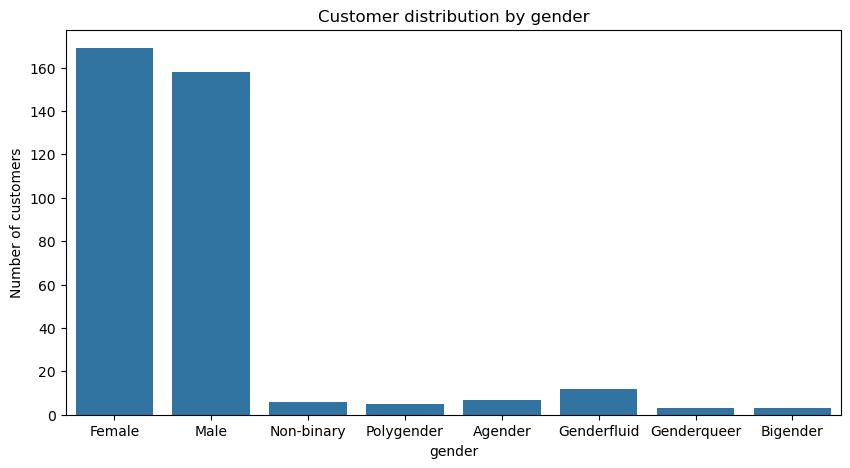

In [19]:
#1
customers = customers.dropna()

plt.figure(figsize=(10, 5)) 
sns.countplot(x='gender', data=customers)
plt.title('Customer distribution by gender')
plt.xlabel('gender')
plt.ylabel('Number of customers')

plt.show()

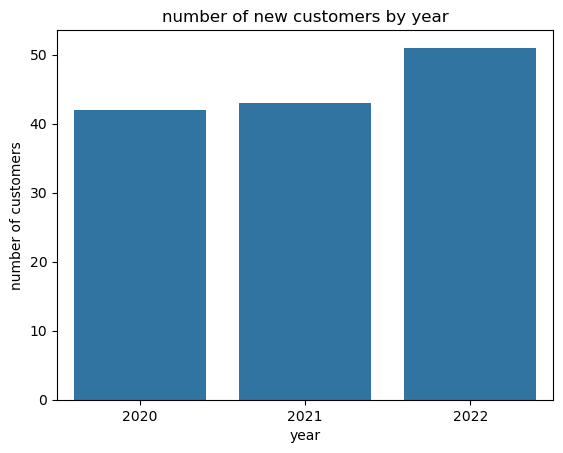

In [25]:
#4
customers['joining_date'] = pd.to_datetime(customers['joining_date'], errors='coerce')
customers = customers.dropna(subset=['joining_date']) 

customers['year_joined'] = customers['joining_date'].dt.year

sns.countplot(x='year_joined', data=customers)
plt.title('number of new customers by year')
plt.xlabel('year')
plt.ylabel('number of customers')
plt.show()

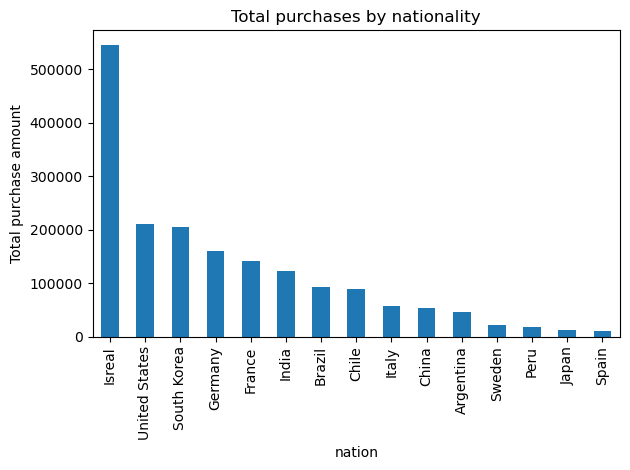

In [43]:
#7
df = pd.merge(order_item, Items, left_on='item_id', right_on='id')
df = pd.merge(df, orders, left_on='order_id', right_on='order_id')
df = pd.merge(df, customers, left_on='customer_id', right_on='id')

df = df.dropna(subset=['item_price', 'quantity', 'nationallity'])

df['total_price'] = df['quantity'] * df['item_price']

grouped = df.groupby('nationallity')['total_price'].sum().sort_values(ascending=False)

grouped.plot(kind='bar')
plt.title('Total purchases by nationality')
plt.ylabel('Total purchase amount')
plt.xlabel('nation')
plt.tight_layout()
plt.show()